Simulación Urgencias 
Juan José Tobón Vargas \n
*   Juan José Tobón Vargas
*   Maria José Tirado Hernandez 
*   Liliana Marcela Correa Sepulveda


In [ ]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


In [ ]:
path = 'titanic3.xlsx'
df = pd.read_excel(path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


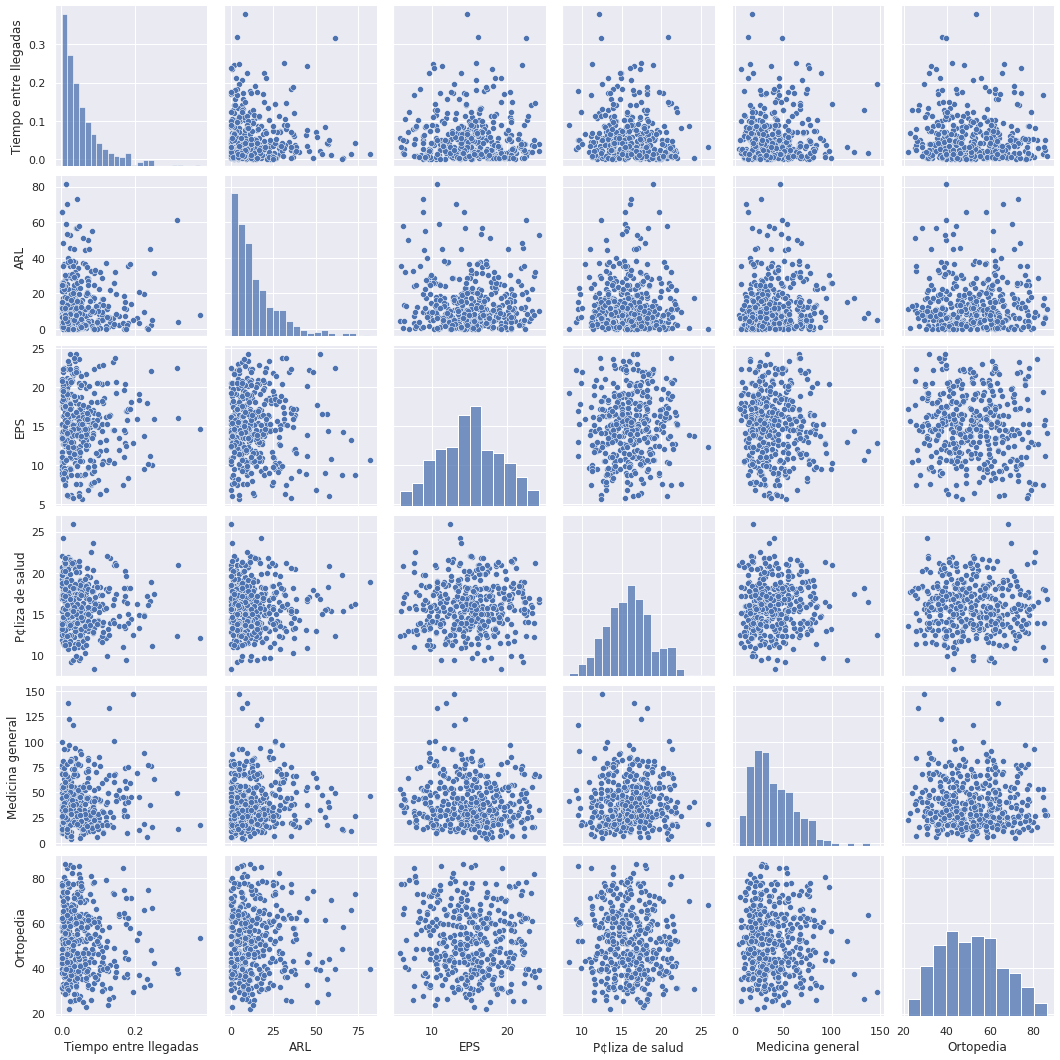

In [ ]:
#Histogramas(diagonal principal de las tablas)
df1=df.select_dtypes(exclude= 'object').drop(columns = ["Paciente"])
sns.pairplot(data = df1);

In [ ]:
def simulacionTriage(horas):

  #Dias a simular
  dias = int(round(horas*(1/24),0))

  #Vectores para guardar el personal necesario
  ptriage = np.zeros(dias)
  pmedicina = np.zeros(dias)
  portopedia = np.zeros(dias)

  for i in range(dias):

    #Tiempos Acumulados
    tiempollegada=0
    tiempotriage=0
    tiempomedicina=0
    tiempoortopedia=0

    reloj=0
    while reloj < 24: #Reloj en horas

      #Simulamos las llegadas
      rtllegadas = np.random.exponential(0.05664)
      tiempollegada+=rtllegadas
      reloj+=rtllegadas

      #Simulación Triage
      rtriage = np.random.uniform()
      if rtriage < 1/3:
        rarl = np.random.exponential(14.10494)
        tiempotriage += rarl*(1/60) #rarl/60 para pasar a horas
      else:
        if rtriage < 2/3:
          reps = np.random.normal(15.03182, 4.14391)
          tiempotriage += reps*(1/60) #reps/60 para pasar a horas
        else:
            rpoliza = np.random.normal(15.97, 2.9)
            tiempotriage += rpoliza*(1/60) #rpoliza/60 para pasar a horas
      
      #Simulación Medicina General
      rcon = np.random.uniform() #Para saber si el paciente pasa o no a consulta con médico general
      if rcon < 0.85:
        rmed = np.random.gamma(13.12773,3.08695)
        tiempomedicina += rmed*(1/60) #rmed/60 para pasar a horas
        
        #Simulamos si pasa a ortopedia
        rort = np.random.uniform()
        if rort < 0.6725:
          rtort = np.random.triangular(22.0166, 51.6798, 86.3452)
          tiempoortopedia += rtort*(1/60) #rtort/60 para pasar a horas
    ptriage[i] = tiempotriage/12
    pmedicina[i] = tiempomedicina/12
    portopedia[i] = tiempoortopedia/12

    enfermeros = math.ceil(np.mean(ptriage))
    medicos = math.ceil(np.mean(pmedicina))
    ortopedistas = math.ceil(np.mean(portopedia))

    
    
  #return(print("La cantidad necesaria de enfermeros es de: ", enfermeros), print("La cantidad necesaria de medicos generales es de: ", medicos), print("La cantidad necesaria de ortopedistas es de: ", ortopedistas))
  if enfermeros > 12:
    print(f"faltan {enfermeros-12} enfermeros")
  else:
    print("No faltan enfermeros")
  if medicos > 8:
    print(f"Faltan {medicos-8} medicos")
  else:
    print("No faltan médicos")
  if ortopedistas > 4:
    print(f"Faltan {ortopedistas-4} ortopedistas")
  else:
    print("No faltan ortopedistas")
  print("La cantidad necesaria de enfermeros es de: ", enfermeros), print("La cantidad necesaria de medicos generales es de: ", medicos), print("La cantidad necesaria de ortopedistas es de: ", ortopedistas)

In [ ]:
simulacionTriage(1000)

No faltan enfermeros
Faltan 13 medicos
Faltan 15 ortopedistas
La cantidad necesaria de enfermeros es de:  9
La cantidad necesaria de medicos generales es de:  21
La cantidad necesaria de ortopedistas es de:  19


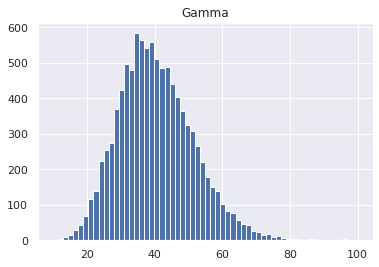

<Figure size 432x288 with 0 Axes>

In [ ]:
X = []
for i in range(10000):
  X.append(np.random.gamma(13.12773, 3.08695))
plt.title('Gamma')
plt.hist(X, bins = 60)
plt.grid(True)
plt.show()
plt.clf()